In [1]:
import pandas as pd
import numpy as np

In [2]:
raw_election_data=pd.read_csv('LS_2.0.csv')

In [3]:
raw_election_data.head()
raw_election_data.at[172, "TOTAL\nVOTES"]=357169
raw_election_data.at[173, "TOTAL\nVOTES"]=33772

In [4]:
# Creating a function  for cleaning the assests liabilities

def convert(x):
    if str(x)[0]=='R':
        return float(str(x).split()[1].replace(',',''))
    return 0.0

In [5]:
raw_election_data.ASSETS=raw_election_data.ASSETS.apply(convert)
raw_election_data.LIABILITIES=raw_election_data.LIABILITIES.apply(convert)

In [6]:
raw_election_data.sample(5)

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL\nCASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS
878,Haryana,HISAR,BRIJENDRA SINGH,1,BJP,Lotus,MALE,0,46.0,GENERAL,Post Graduate,146408734.0,27225637.0,599951,3338,603289,36.970383,51.044947,1631817
2113,Tamil Nadu,TIRUPPUR,"CHANDIRAKUMAR, V.S.",0,MNM,Battery Torch,MALE,0,46.0,GENERAL,10th Pass,51756996.0,41924988.0,64538,119,64657,4.225909,5.772467,1530014
1963,Bihar,SITAMARHI,Vinod Sah,0,IND,Helicopter,MALE,0,48.0,GENERAL,Literate,539731.0,0.0,17724,0,17724,1.011382,1.704886,1752454
1860,Maharashtra,SANGLI,Gopichand Kundlik Padalkar,0,VBA,Cup & Saucer,MALE,5,36.0,GENERAL,12th Pass,10372000.0,42000.0,297349,2885,300234,16.595683,25.175356,1809109
1085,Uttar Pradesh,KANPUR,Ram Kumar,0,SP,Bicycle,MALE,1,61.0,GENERAL,Post Graduate,198048000.0,610000.0,47703,572,48275,2.956246,5.723727,1632983


In [7]:
raw_election_data['EDUCATION'].value_counts()

EDUCATION
Post Graduate            502
Graduate                 441
Graduate Professional    336
12th Pass                256
10th Pass                196
8th Pass                  78
Doctorate                 73
Others                    50
Literate                  30
5th Pass                  28
Not Available             22
Illiterate                 5
Post Graduate\n            1
Name: count, dtype: int64

In [8]:
raw_election_data.loc[raw_election_data['EDUCATION'] == "Post Graduate\n", "EDUCATION"] = "Post Graduate"
raw_election_data.loc[raw_election_data['EDUCATION'] == "Graduate Professional", "EDUCATION"] = "Graduate\nProfessional"


In [9]:
raw_election_data.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL\nCASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,3099414.0,231450.0,376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,18477888.0,847000.0,318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,36491000.0,15300000.0,314057,181,314238,21.092771,29.534285,1489790
3,Telangana,ADILABAD,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,13030,6,13036,0.875023,1.225214,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,74274036.0,8606522.0,644459,2416,646875,33.383823,56.464615,1937690


In [10]:
raw_election_data.isna().sum()

STATE                                          0
CONSTITUENCY                                   0
NAME                                           0
WINNER                                         0
PARTY                                          0
SYMBOL                                       245
GENDER                                       245
CRIMINAL\nCASES                              245
AGE                                          245
CATEGORY                                     245
EDUCATION                                    245
ASSETS                                         0
LIABILITIES                                    0
GENERAL\nVOTES                                 0
POSTAL\nVOTES                                  0
TOTAL\nVOTES                                   0
OVER TOTAL ELECTORS \nIN CONSTITUENCY          0
OVER TOTAL VOTES POLLED \nIN CONSTITUENCY      0
TOTAL ELECTORS                                 0
dtype: int64

In [11]:
raw_election_data.columns


Index(['STATE', 'CONSTITUENCY', 'NAME', 'WINNER', 'PARTY', 'SYMBOL', 'GENDER',
       'CRIMINAL\nCASES', 'AGE', 'CATEGORY', 'EDUCATION', 'ASSETS',
       'LIABILITIES', 'GENERAL\nVOTES', 'POSTAL\nVOTES', 'TOTAL\nVOTES',
       'OVER TOTAL ELECTORS \nIN CONSTITUENCY',
       'OVER TOTAL VOTES POLLED \nIN CONSTITUENCY', 'TOTAL ELECTORS'],
      dtype='object')

In [12]:
candidates_df = raw_election_data.drop(['SYMBOL', 'GENERAL\nVOTES', 'POSTAL\nVOTES',
                        'OVER TOTAL ELECTORS \nIN CONSTITUENCY', 'OVER TOTAL VOTES POLLED \nIN CONSTITUENCY'], axis=1)
# take out the unnecessary columns

In [13]:
candidates_df.rename(columns = {"CRIMINAL\nCASES": "CRIMINAL CASES", "TOTAL\nVOTES": "TOTAL VOTES"}, inplace = True)
candidates_df.sort_values(["STATE", "CONSTITUENCY"], inplace = True)
# rename some of the columns and sort the data with respect to State and Constituency columns

In [14]:
candidates_df.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,GENDER,CRIMINAL CASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,TOTAL VOTES,TOTAL ELECTORS
105,Andaman & Nicobar Islands,ANDAMAN & NICOBAR ISLANDS,KULDEEP RAI SHARMA,1,INC,MALE,0,52.0,GENERAL,Graduate\nProfessional,132233012.0,80450870.0,95308,318471
106,Andaman & Nicobar Islands,ANDAMAN & NICOBAR ISLANDS,VISHAL JOLLY,0,BJP,MALE,1,46.0,GENERAL,Graduate\nProfessional,85140573.0,4633914.0,93901,318471
107,Andaman & Nicobar Islands,ANDAMAN & NICOBAR ISLANDS,PARITOSH KUMAR HALDAR,0,IND,MALE,0,61.0,GENERAL,Post Graduate,19916000.0,1311000.0,5341,318471
108,Andaman & Nicobar Islands,ANDAMAN & NICOBAR ISLANDS,SANJAY MESHACK,0,AAP,MALE,0,49.0,GENERAL,12th Pass,99887782.0,1791076.0,2839,318471
109,Andaman & Nicobar Islands,ANDAMAN & NICOBAR ISLANDS,PRAKASH MINJ,0,BSP,MALE,0,43.0,SC,Post Graduate,1250000.0,240000.0,2486,318471


In [15]:
candidates_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2263 entries, 105 to 2171
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   STATE           2263 non-null   object 
 1   CONSTITUENCY    2263 non-null   object 
 2   NAME            2263 non-null   object 
 3   WINNER          2263 non-null   int64  
 4   PARTY           2263 non-null   object 
 5   GENDER          2018 non-null   object 
 6   CRIMINAL CASES  2018 non-null   object 
 7   AGE             2018 non-null   float64
 8   CATEGORY        2018 non-null   object 
 9   EDUCATION       2018 non-null   object 
 10  ASSETS          2263 non-null   float64
 11  LIABILITIES     2263 non-null   float64
 12  TOTAL VOTES     2263 non-null   int64  
 13  TOTAL ELECTORS  2263 non-null   int64  
dtypes: float64(3), int64(3), object(8)
memory usage: 265.2+ KB


In [16]:
candidates_df["CRIMINAL CASES"] = pd.to_numeric(candidates_df["CRIMINAL CASES"], errors = 'coerce').convert_dtypes()


In [17]:
candidates_personal_df=candidates_df[candidates_df.NAME!='NOTA']

In [18]:
candidates_personal_df=candidates_personal_df.drop(['TOTAL VOTES','TOTAL ELECTORS'],axis=1)

In [19]:
candidates_personal_df.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,GENDER,CRIMINAL CASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES
105,Andaman & Nicobar Islands,ANDAMAN & NICOBAR ISLANDS,KULDEEP RAI SHARMA,1,INC,MALE,0,52.0,GENERAL,Graduate\nProfessional,132233012.0,80450870.0
106,Andaman & Nicobar Islands,ANDAMAN & NICOBAR ISLANDS,VISHAL JOLLY,0,BJP,MALE,1,46.0,GENERAL,Graduate\nProfessional,85140573.0,4633914.0
107,Andaman & Nicobar Islands,ANDAMAN & NICOBAR ISLANDS,PARITOSH KUMAR HALDAR,0,IND,MALE,0,61.0,GENERAL,Post Graduate,19916000.0,1311000.0
108,Andaman & Nicobar Islands,ANDAMAN & NICOBAR ISLANDS,SANJAY MESHACK,0,AAP,MALE,0,49.0,GENERAL,12th Pass,99887782.0,1791076.0
109,Andaman & Nicobar Islands,ANDAMAN & NICOBAR ISLANDS,PRAKASH MINJ,0,BSP,MALE,0,43.0,SC,Post Graduate,1250000.0,240000.0


In [20]:
candidates_personal_df.isna().sum()

STATE              0
CONSTITUENCY       0
NAME               0
WINNER             0
PARTY              0
GENDER             0
CRIMINAL CASES    22
AGE                0
CATEGORY           0
EDUCATION          0
ASSETS             0
LIABILITIES        0
dtype: int64

In [21]:
winners_df=candidates_df[candidates_df.WINNER==1].sort_values(['STATE','CONSTITUENCY']).reset_index()

In [22]:
winners_df.drop(['index','WINNER'],axis=1,inplace=True)

In [23]:
winners_df

,STATE,CONSTITUENCY,NAME,PARTY,GENDER,CRIMINAL CASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,TOTAL VOTES,TOTAL ELECTORS
0,Andaman & Nicobar Islands,ANDAMAN & NICOBAR ISLANDS,KULDEEP RAI SHARMA,INC,MALE,0,52.0,GENERAL,Graduate\nProfessional,132233012.0,80450870.0,95308,318471
1,Andhra Pradesh,AMALAPURAM,CHINTA ANURADHA,YSRCP,FEMALE,0,46.0,SC,Graduate,85993362.0,2431407.0,485958,1459556
2,Andhra Pradesh,ANAKAPALLI,Dr.Beesetti Venkata Satyavathi,YSRCP,FEMALE,0,52.0,GENERAL,Graduate\nProfessional,91526244.0,11139279.0,586226,1521363
3,Andhra Pradesh,ANANTAPUR,TALARI RANGAIAH,YSRCP,MALE,2,48.0,GENERAL,Doctorate,11773091.0,1135547.0,695208,1664160
4,Andhra Pradesh,ARUKU,GODDETI. MADHAVI,YSRCP,FEMALE,0,26.0,ST,Graduate\nProfessional,141179.0,0.0,562190,1451418
...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,West Bengal,RAIGANJ,DEBASREE CHAUDHURI,BJP,FEMALE,2,48.0,GENERAL,Post Graduate,6139123.0,823416.0,511652,1601220
535,West Bengal,RANAGHAT,JAGANNATH SARKAR,BJP,MALE,1,56.0,SC,Graduate\nProfessional,17622476.0,0.0,783253,1762252
536,West Bengal,SRERAMPUR,KALYAN BANERJEE,AITC,MALE,0,62.0,GENERAL,Graduate\nProfessional,175968902.0,5522403.0,637707,1785472
537,West Bengal,TAMLUK,Adhikari Dibyendu,AITC,MALE,1,42.0,GENERAL,Graduate,37687867.0,8397501.0,724433,1694646


In [24]:
print("Number of Parties which fielded at least 1 candidate: ", candidates_df.PARTY.unique().shape[0]-2)
                                                                 # -2 : 1 for independent candidates and 1 for NOTA

Number of Parties which fielded at least 1 candidate:  131


In [25]:
print("Number of Independent Candidates who contested the elections: ", candidates_df[candidates_df.PARTY == 'IND'].shape[0])

Number of Independent Candidates who contested the elections:  201


In [26]:
print("Number of Parties which won at least 1 seat: ", winners_df.PARTY.unique().shape[0] - 1)
                                                                # -1 : for independent winners

Number of Parties which won at least 1 seat:  35


In [27]:
print("Number of Independent Winners: ", winners_df[winners_df.PARTY == 'IND'].shape[0])

Number of Independent Winners:  4


# Exploratory Analysis and Visualization

In [28]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (15, 10)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## Seat Share

In [29]:
all_party_seats=winners_df.PARTY.value_counts().sort_values(ascending=False)


In [30]:
all_party_seats

PARTY
BJP       300
INC        52
DMK        23
YSRCP      22
AITC       22
SHS        18
JD(U)      16
BSP        11
BJD        11
TRS         9
LJP         6
SP          5
CPI(M)      5
NCP         5
IND         4
JKN         3
TDP         3
IUML        3
AIMIM       2
ADAL        2
SAD         2
NPEP        1
MNF         1
NDPP        1
AIUDF       1
KEC(M)      1
AAP         1
RLTP        1
SKM         1
RSP         1
VCK         1
AIADMK      1
JD(S)       1
JMM         1
AJSUP       1
NPF         1
Name: count, dtype: int64

In [31]:
others=all_party_seats[all_party_seats<10].sum()

In [32]:
seat_distribution=all_party_seats[all_party_seats>=10]._append(pd.Series({'Others':others}))

In [33]:
seat_distribution

BJP       300
INC        52
DMK        23
YSRCP      22
AITC       22
SHS        18
JD(U)      16
BSP        11
BJD        11
Others     64
dtype: int64

## Pie Charts

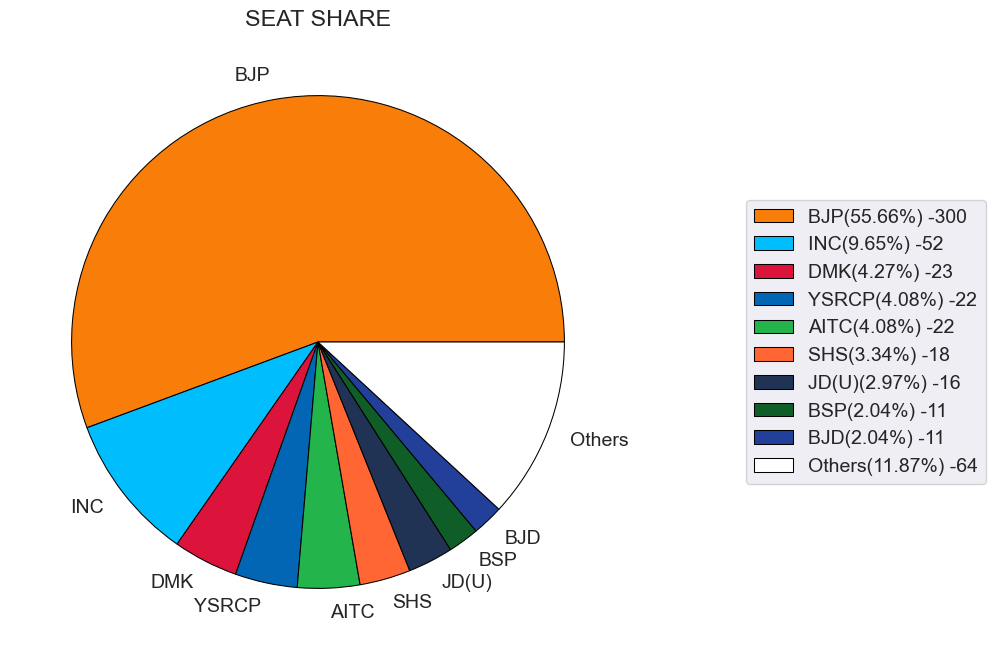

In [34]:
plt.figure(figsize=(10,8))
plt.title('SEAT SHARE')

# Basic details
plt.pie(seat_distribution,labels=seat_distribution.index,
       colors=['#f97d09', '#00bdfe', '#dc143c', '#0266b4', '#24b44c', '#ff6634', 
                                     '#203354', '#105e27', '#22409a', '#FFFFFF'],
       wedgeprops={'edgecolor':'black','linewidth':0.75,'antialiased':True})

seat_percent=round((seat_distribution/seat_distribution.sum())*100,2)
legend=seat_percent.index+'('+seat_percent.values.astype(str)+'%) -'+ seat_distribution.values.astype(str)

plt.legend(legend,loc='right',bbox_to_anchor=(1.6,0.5));


## Age

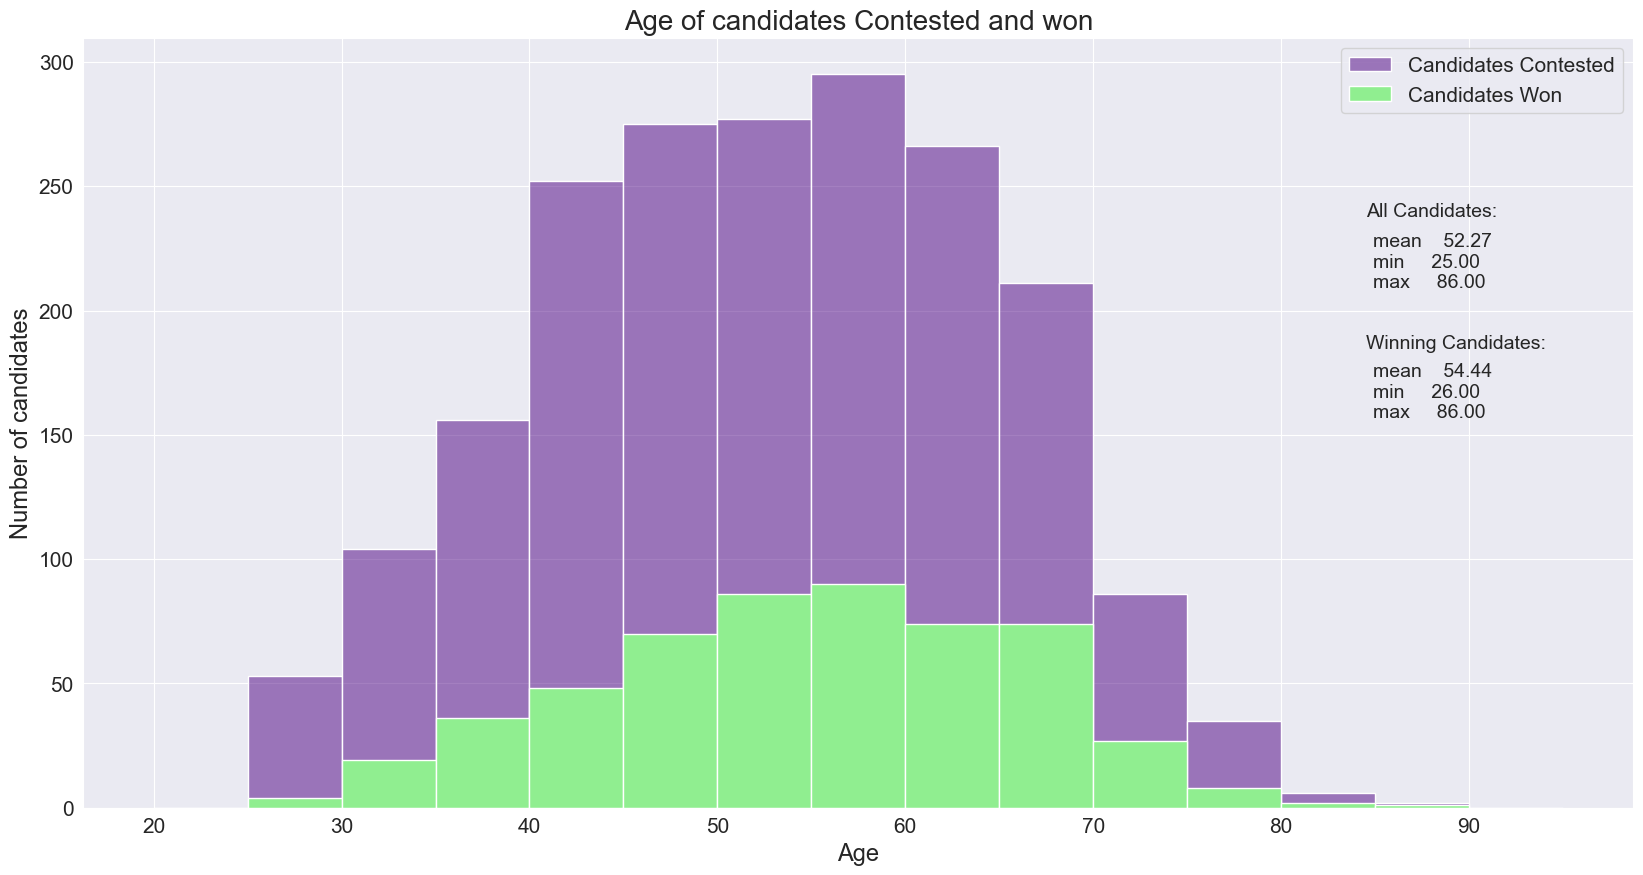

In [35]:
plt.figure(figsize=(20,10))
plt.title("Age of candidates Contested and won",fontsize=20)
plt.xlabel("Age",fontsize=17)
plt.ylabel('Number of candidates',fontsize=17)
#put the basic labelling

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#axes ticks size

sns.histplot(data=candidates_personal_df, x='AGE',bins=np.arange(20,100,5),color='indigo',alpha=0.5)
sns.histplot(data=winners_df, x='AGE',bins=np.arange(20,100,5),color='lightgreen',alpha=1)
# two histograms plotted, Won over Contested to show the relative percentage

plt.legend(['Candidates Contested', 'Candidates Won'],fontsize=15)
#legend to the plot

plt.text(84.5,238,'All Candidates:')
plt.figtext(0.77,0.63,round(candidates_personal_df.describe().AGE[['mean','min','max']],2).to_string())

plt.text(84.5,185,'Winning Candidates:')
plt.figtext(0.77,0.5,round(winners_df.describe().AGE[['mean','min','max']],2).to_string());

In [36]:
print('Youngest Member of the House:')
winners_df[(winners_df.AGE==26)][["NAME","PARTY","STATE","CONSTITUENCY"]].reset_index(drop=True)

Youngest Member of the House:


,NAME,PARTY,STATE,CONSTITUENCY
0,GODDETI. MADHAVI,YSRCP,Andhra Pradesh,ARUKU


In [37]:
print('Oldest Member of the House:')
winners_df[(winners_df.AGE==86)][["NAME","PARTY","STATE","CONSTITUENCY"]].reset_index(drop=True)

Oldest Member of the House:


,NAME,PARTY,STATE,CONSTITUENCY
0,DR. SHAFIQUR REHMAN BARQ,SP,Uttar Pradesh,SAMBHAL


## Seat Category

In [38]:
seat_category=winners_df.CATEGORY.value_counts()

In [39]:
seat_category

CATEGORY
GENERAL    399
SC          85
ST          55
Name: count, dtype: int64

### Plot distribution as pie

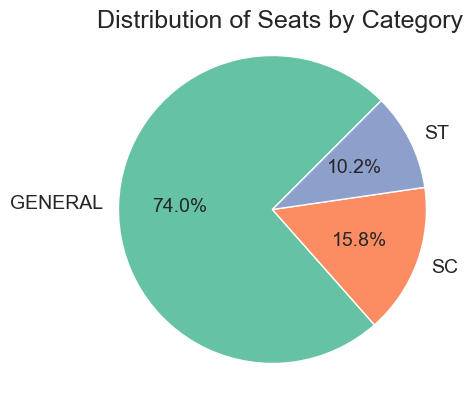

In [40]:
sns.set_palette(sns.color_palette('Set2'))
plt.figure(figsize=(8,5))
plt.title("Distribution of Seats by Category", size=18, x=0.52,y=0.95)

plt.pie(seat_category,labels=seat_category.index,autopct='%1.1f%%',startangle=45);

## Gender

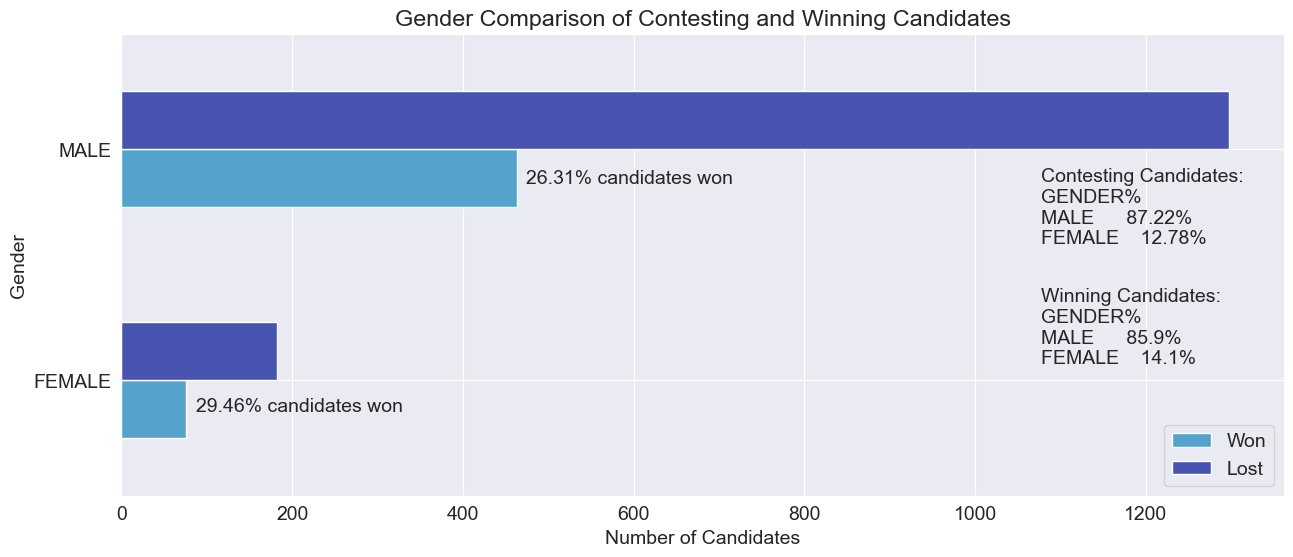

In [41]:
gender_group=candidates_personal_df.groupby(['GENDER',"WINNER"]).size()
gender_group=gender_group.unstack()
gender_group=gender_group[[1,0]]
#a2a from stack overflow

# gender with winning condition is extracted as a dataframe

sns.set_palette(sns.color_palette('icefire'))
# color palette set
gender_group.plot(kind='barh',figsize=(15,6), title='Gender Comparison of Contesting and Winning Candidates')
# harizontal bar plot created with pandas 

plt.legend(['Won','Lost'])
plt.xlabel('Number of Candidates')
plt.ylabel('Gender')
# legend and labels set

plt.figtext(0.738,0.53, "Contesting Candidates:\n"+
           round((candidates_personal_df.GENDER.value_counts(normalize=True)*100),2).to_string().replace('\n','%\n')+'%')

plt.figtext(0.738,0.33, "Winning Candidates:\n"+
           round((winners_df.GENDER.value_counts(normalize=True)*100),2).to_string().replace('\n','%\n')+'%')

win_percent=round((winners_df.GENDER.value_counts()/candidates_personal_df.GENDER.value_counts())*100,2)
plt.figtext(0.395,0.63,str(round(win_percent.MALE,2))+ '% candidates won')
plt.figtext(0.175,0.25,str(round(win_percent.FEMALE,2))+ '% candidates won');
#percentage of winning, gender-wise printed on the chart

In [42]:
print("No. of male MPs:",winners_df.GENDER.value_counts()["MALE"])
print("No. of female MPs:",winners_df.GENDER.value_counts()["FEMALE"])

No. of male MPs: 463
No. of female MPs: 76


## Educational Qualifications

In [43]:
winners_df['EDUCATION'].unique()

array(['Graduate\nProfessional', 'Graduate', 'Doctorate', '8th Pass',
       'Post Graduate', '12th Pass', '10th Pass', 'Literate', 'Others',
       '5th Pass', 'Illiterate'], dtype=object)

In [44]:
education=winners_df.EDUCATION.value_counts()
education=education.reindex(["Illiterate", "Literate", "5th Pass", "8th Pass", "10th Pass", "12th Pass", "Graduate", 
                               "Graduate\nProfessional","Post Graduate", "Doctorate", "Others"])

In [45]:
education

EDUCATION
Illiterate                  1
Literate                    2
5th Pass                    4
8th Pass                   12
10th Pass                  45
12th Pass                  69
Graduate                  132
Graduate\nProfessional     99
Post Graduate             135
Doctorate                  23
Others                     17
Name: count, dtype: int64

### Plot the data as bar chart

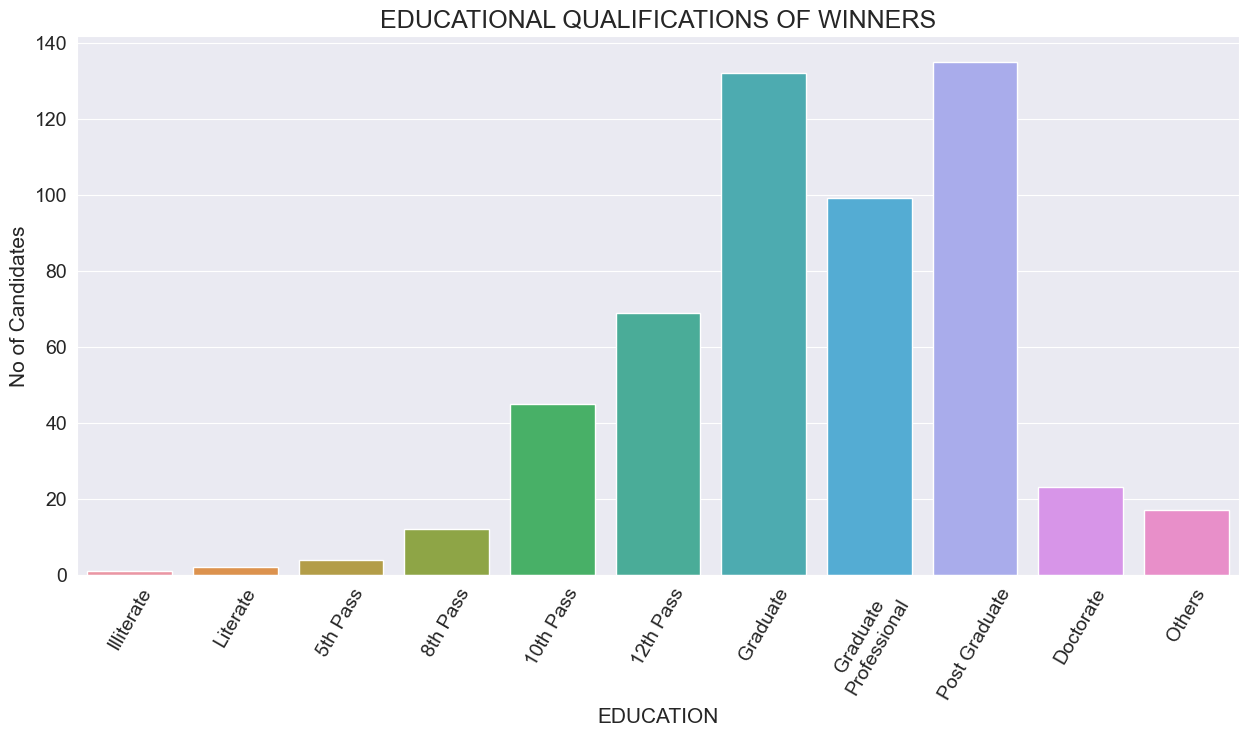

In [46]:
plt.figure(figsize=(15,7))
plt.xticks(rotation=60)
# plot detailing

plt.xlabel("Education Status",fontsize=15)
plt.ylabel("No of Candidates",fontsize=15)
plt.title('EDUCATIONAL QUALIFICATIONS OF WINNERS',fontsize=18)
# labels and title

sns.barplot(x=education.index, y=education.values);


## States/UTs and Constituencies had the highest and lowest voter Turnout?

In [47]:
total_voters=candidates_df.groupby(["STATE","CONSTITUENCY"])[["TOTAL VOTES"]].sum()
total_electors=winners_df.groupby(["STATE","CONSTITUENCY"])[["TOTAL ELECTORS"]].sum()
votes_df=total_voters.join(total_electors)
votes_df['VOTES TURNOUT']=round(votes_df['TOTAL VOTES']/votes_df['TOTAL ELECTORS']*100,2)

In [48]:
votes_df=votes_df.rename(index={"Andaman & Nicobar Islands":"Andaman &\nNicobar Islands"})

const_turnout=votes_df.sort_values(by=['VOTES TURNOUT'],ascending=False)

high_consts=const_turnout.head(10)
low_consts=const_turnout.tail(10)

In [49]:
const_turnout.fillna(const_turnout.mean(), inplace=True)

In [50]:
# Just for aesthetics

xh=high_consts.index.get_level_values(1)+'\n('+ high_consts.index.get_level_values(0)+')'
xl=low_consts.index.get_level_values(1)+'\n('+ low_consts.index.get_level_values(0)+')'

In [51]:
states_df=votes_df.groupby("STATE").sum().drop(['VOTES TURNOUT'],axis=1)
states_df['VOTES TURNOUT']=round(states_df['TOTAL VOTES']/states_df['TOTAL ELECTORS']*100,2)

In [52]:
states_turnout=states_df.sort_values(by='VOTES TURNOUT',ascending=False)
high_stat=states_turnout.head(10)
low_stat=states_turnout.tail(10)

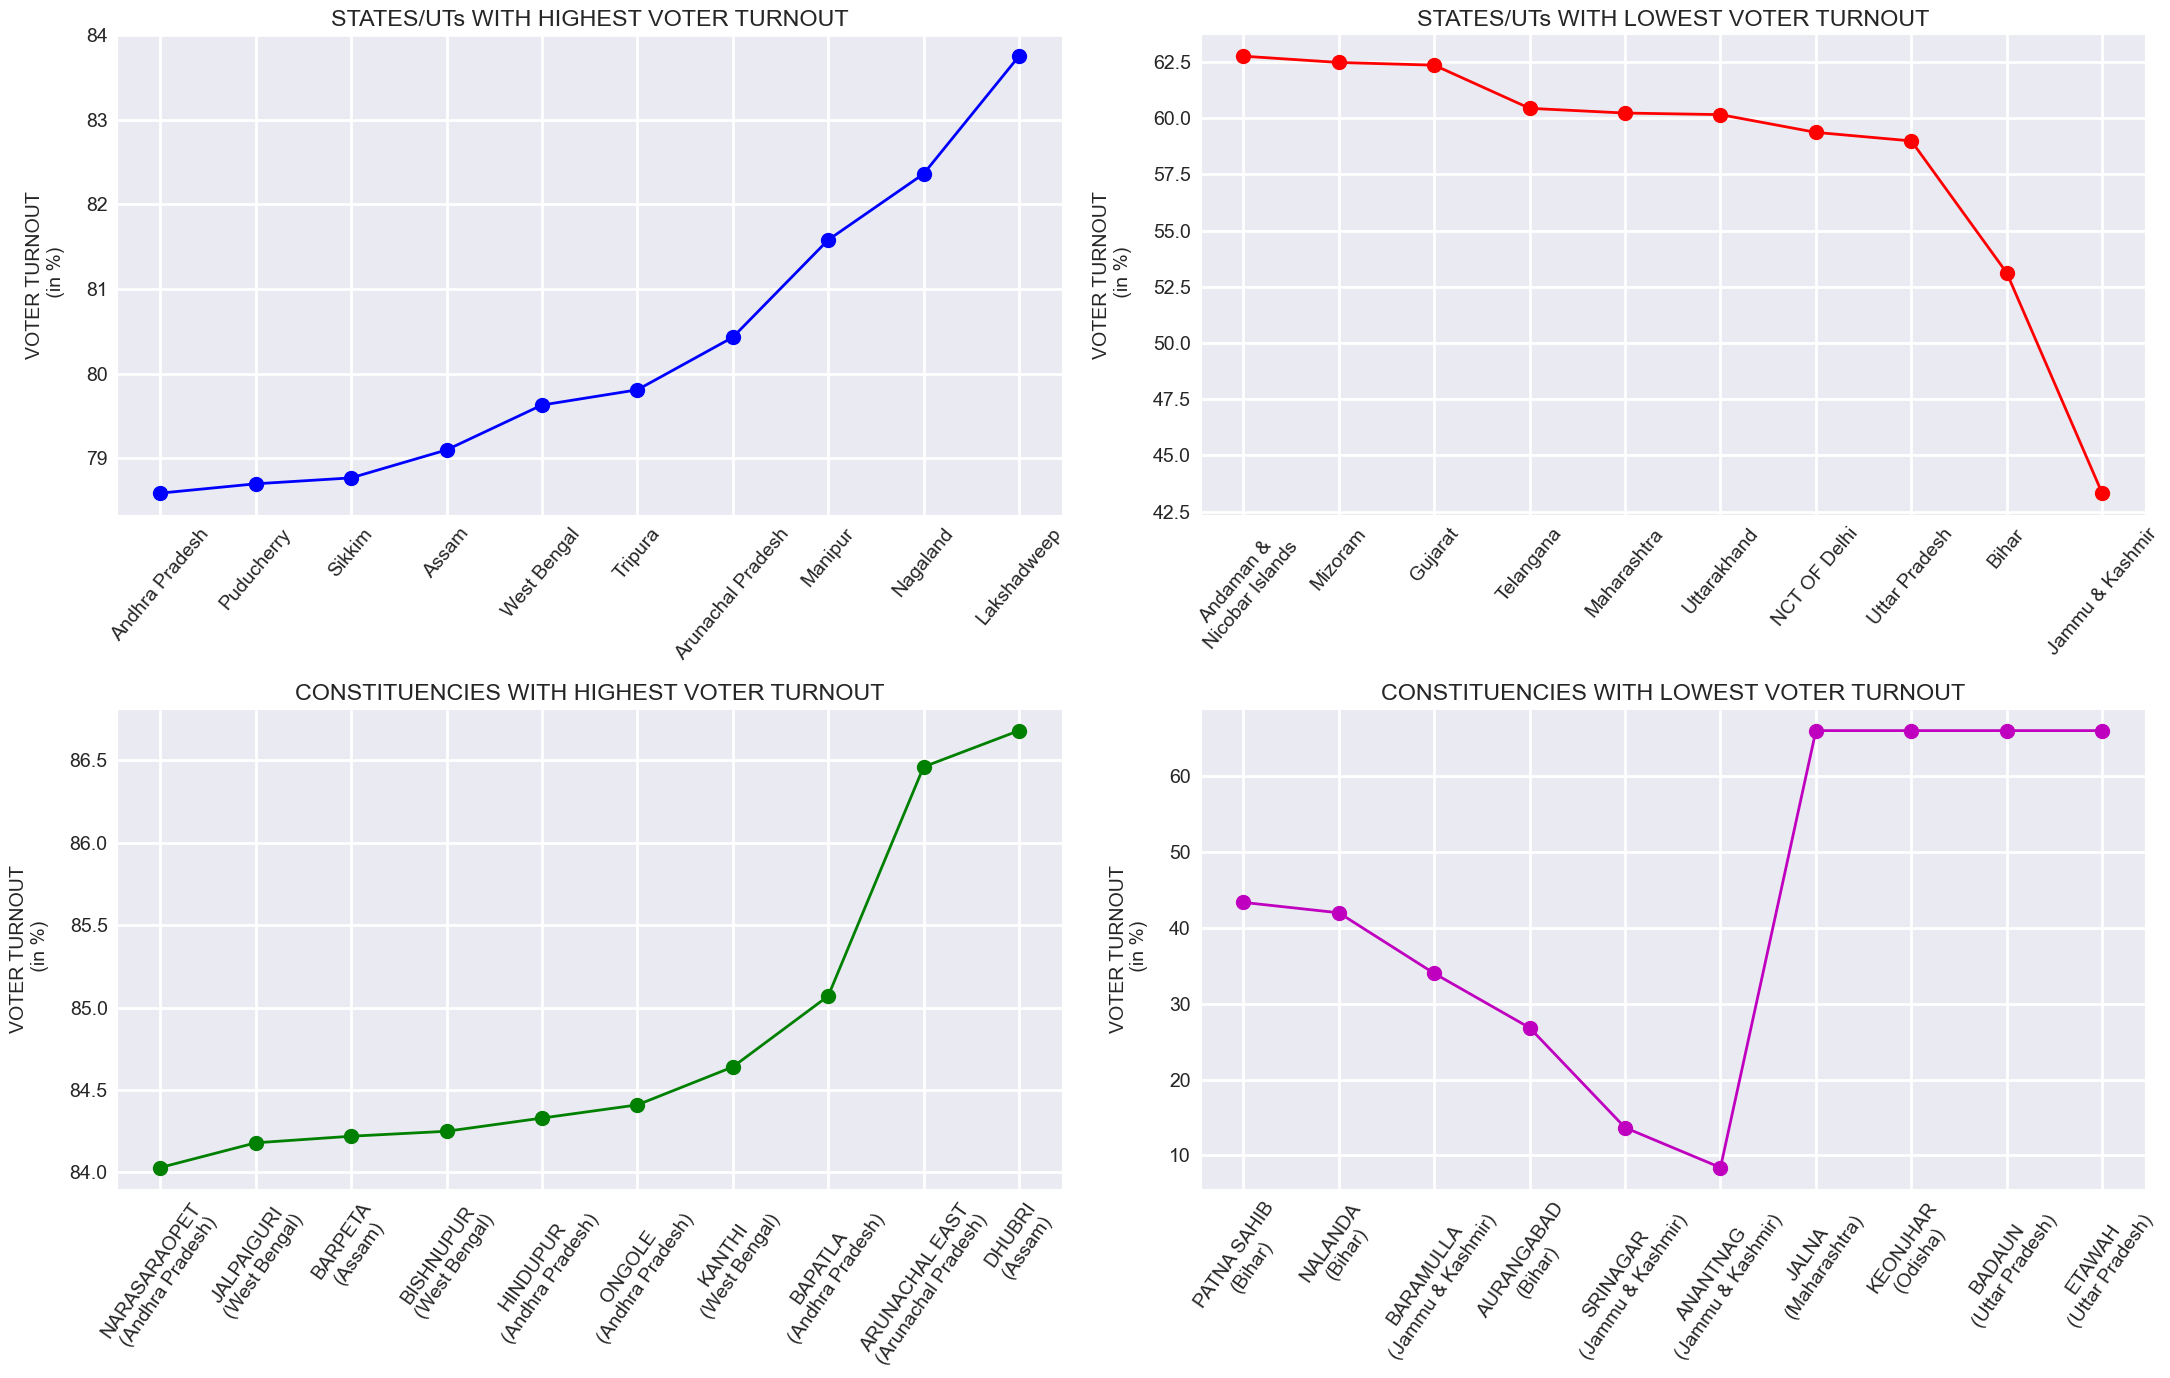

In [53]:
fig, axes = plt.subplots(2,2, figsize = (22,14))
# plot will be a subplot of 4 plots
# First row will be of States, second row of Constituencies

# Highest State Voter Outcome Plot
axes[0][0].tick_params(axis = 'x', labelrotation = 50)
axes[0][0].plot(high_stat.index[::-1], high_stat["VOTES TURNOUT"][::-1], 'b-o', linewidth = 2,
         markersize = 10)
axes[0][0].set_ylabel("VOTER TURNOUT\n (in %)", labelpad = 15)
axes[0][0].set_title("STATES/UTs WITH HIGHEST VOTER TURNOUT")
axes[0][0].grid(linewidth = 2)
# putting the necessary detailing and plotting, [::-1] is used to reverse the order and get an increasing graph

# Lowest State Voter Outcome Plot
axes[0][1].tick_params(axis = 'x', labelrotation = 50)
axes[0][1].plot(low_stat.index, low_stat["VOTES TURNOUT"], 'r-o', linewidth = 2,
         markersize = 10)
axes[0][1].set_ylabel("VOTER TURNOUT\n (in %)", labelpad = 15)
axes[0][1].set_title("STATES/UTs WITH LOWEST VOTER TURNOUT")
axes[0][1].grid(linewidth = 2)
# putting the necessary detailing and plotting

# Now the Constituencies

# Highest Consituency Voter Outcome Plot
axes[1][0].tick_params(axis = 'x', labelrotation = 55)
axes[1][0].plot(xh[::-1], high_consts["VOTES TURNOUT"][::-1], 'g-o', linewidth = 2,
         markersize = 10)
axes[1][0].set_ylabel("VOTER TURNOUT\n (in %)", labelpad = 15)
axes[1][0].set_title("CONSTITUENCIES WITH HIGHEST VOTER TURNOUT")
axes[1][0].grid(linewidth = 2)
# putting the necessary detailing and plotting, [::-1] is used to reverse the order and get an increasing graph

# Lowest Constituency Voter Outcome Plot
axes[1][1].tick_params(axis = 'x', labelrotation = 55)
axes[1][1].plot(xl, low_consts["VOTES TURNOUT"], 'm-o', linewidth = 2,
         markersize = 10)
axes[1][1].set_ylabel("VOTER TURNOUT\n (in %)", labelpad = 15)
axes[1][1].set_title("CONSTITUENCIES WITH LOWEST VOTER TURNOUT")
axes[1][1].grid(linewidth = 2)
# putting the necessary detailing and plotting

fig.tight_layout();
# to prevent overlapping of plots

In [54]:
nat_average = round(states_turnout.sum()["TOTAL VOTES"]/states_turnout.sum()["TOTAL ELECTORS"]*100,2)
print("National Voter Turnout: ", nat_average, "%", sep="")


National Voter Turnout: 65.65%


## MPs with criminal record

In [55]:
crime = winners_df[winners_df["CRIMINAL CASES"] != 0]['PARTY'].value_counts()
# criminal record of each party

In [56]:
crime

PARTY
BJP       114
INC        30
JD(U)      13
SHS        11
YSRCP      10
DMK        10
AITC        9
LJP         6
BSP         6
TRS         3
NCP         2
SP          2
AIMIM       2
IND         2
IUML        2
CPI(M)      2
TDP         1
BJD         1
SAD         1
AIUDF       1
VCK         1
AJSUP       1
JKN         1
ADAL        1
RSP         1
Name: count, dtype: int64

In [57]:
crime=crime[:9]._append(pd.Series([crime[9:].sum()]))
crime.rename(index={0:"Others"},inplace=True)

## Bar chart for this record

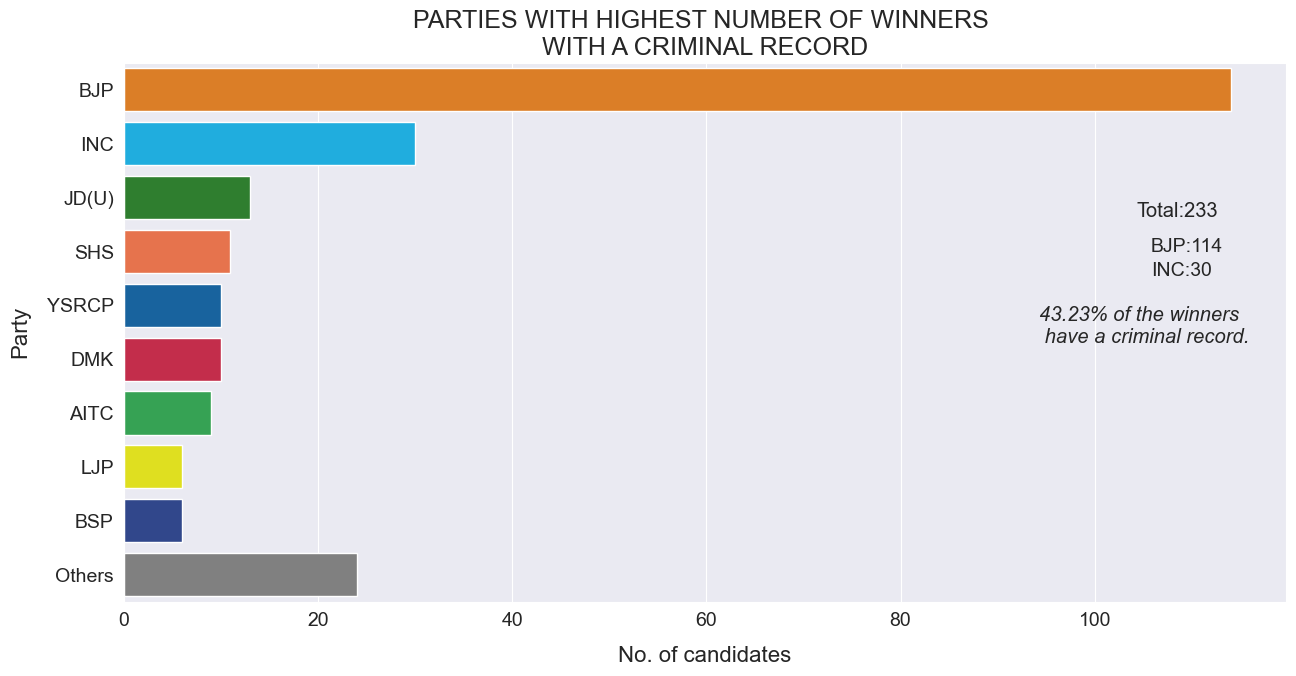

In [58]:
plt.figure(figsize=(15,7))

palette=['#f97d09', '#00bdfe', '#228b22', '#ff6634', '#0266b4', '#dc143c', '#24b44c', 
                                      'yellow', '#22409a', 'grey']
sns.barplot(x=crime.values, y=crime.index,palette=sns.set_palette(palette,10))

plt.title("PARTIES WITH HIGHEST NUMBER OF WINNERS \nWITH A CRIMINAL RECORD",fontsize=18)
plt.ylabel("Party",fontsize=16,labelpad=12)
plt.xlabel("No. of candidates",fontsize=16,labelpad=12)
plt.tick_params(labelsize=14)

plt.figtext(0.8,0.66,"Total:" +str(crime.sum()), fontsize=14.5)
plt.figtext(0.81,0.61,"BJP:"+str(crime["BJP"]),fontsize=14)
plt.figtext(0.81,0.575,"INC:"+str(crime["INC"]),fontsize=14)
plt.figtext(0.735, 0.48, str(round(crime.sum()/winners_df.shape[0]*100,2))+ "% of the winners\n have a criminal record.", 
            fontsize = 14.5, style = 'oblique');

In [59]:
#Some other stats

print(round(crime["BJP"]/seat_distribution["BJP"]*100, 2), "% BJP MPs have a criminal record.", sep = "")
print(round(crime["INC"]/seat_distribution["INC"]*100, 2), "% INC MPs have a criminal record.", sep = "")
print("Both the parties combined gave ", round(crime[["BJP", "INC"]].sum()/crime.sum()*100, 2), "% of the criminals to the House.", 
      sep = "")

38.0% BJP MPs have a criminal record.
57.69% INC MPs have a criminal record.
Both the parties combined gave 61.8% of the criminals to the House.


## Assets, Liabilities and Net Worth

In [60]:
winners_df.insert(11,"NET WORTH",winners_df['ASSETS']-winners_df['LIABILITIES'])


In [61]:
intervals=[5e6,1e7,5e7,10e7,25e7,50e7,100e7]

assets=winners_df['ASSETS'].sort_values()
liabilities=winners_df['LIABILITIES'].sort_values()
net_worth=winners_df['NET WORTH'].sort_values()

In [62]:
# helper function
def segregate(intervals,ownings):
    l = []
    l.append(ownings[ownings<=intervals[0]].count())
    for i in range(len(intervals)-1):
        l.append(ownings[(ownings > intervals[i]) & (ownings <= intervals[i+1])].count())
    l.append(ownings[ownings>intervals[i+1]].count())
    return l

In [63]:
data={"ASSETS":segregate(intervals,assets),
     "LIABILITIES":segregate(intervals,liabilities),
     "NET WORTH":segregate(intervals,net_worth)}

worth_df=pd.DataFrame(data,index=["<=50lac", ">50lac & <=1cr", ">1cr & <=5cr", ">5cr & <=10cr", ">10cr & <=25cr",
                           ">25cr & <=50cr", ">50cr & <=100cr", ">100cr"])

In [64]:
worth_df

,ASSETS,LIABILITIES,NET WORTH
<=50lac,35,338,43
>50lac & <=1cr,28,54,37
>1cr & <=5cr,211,91,208
>5cr & <=10cr,84,17,80
>10cr & <=25cr,89,22,88
>25cr & <=50cr,43,6,43
>50cr & <=100cr,23,7,19
>100cr,26,4,21


In [65]:
 #Purely for visualization purposes

worth_df = worth_df.transpose()
# dataframe inverted for visualization purposes
worth_df.reset_index(inplace = True)
# index column added to the DataFrame

worth_df

,index,<=50lac,>50lac & <=1cr,>1cr & <=5cr,>5cr & <=10cr,>10cr & <=25cr,>25cr & <=50cr,>50cr & <=100cr,>100cr
0,ASSETS,35,28,211,84,89,43,23,26
1,LIABILITIES,338,54,91,17,22,6,7,4
2,NET WORTH,43,37,208,80,88,43,19,21


## Creating Bar chart


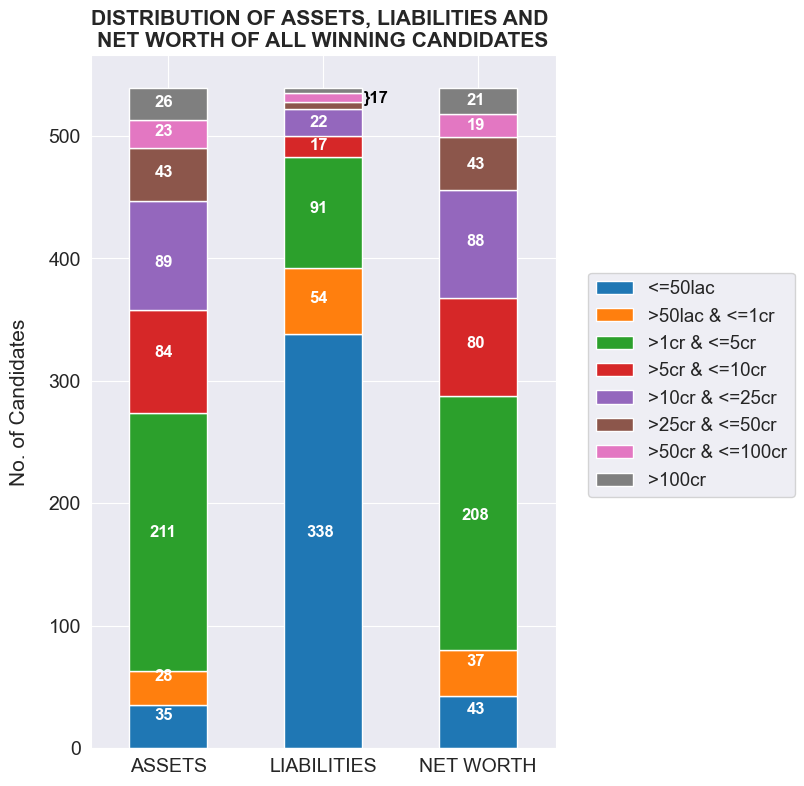

In [66]:
sns.set_palette("tab10")
# set color sequence
worth_df.plot(x = "index", kind = 'bar', stacked = True, figsize = (6,9))
# plot a Stacked Bar chart

plt.xticks(rotation = 0)
plt.tick_params(labelsize = 14)
plt.xlabel(None)
plt.ylabel("No. of Candidates", fontsize = 15, labelpad = 14)
# plot detailing

plt.title("DISTRIBUTION OF ASSETS, LIABILITIES AND \nNET WORTH OF ALL WINNING CANDIDATES", fontsize = 15.25, 
           weight = 'bold')
plt.legend(fontsize = 13.5, bbox_to_anchor = [1.05,0.7]);
# title and legend placed at appropriate positions

# for the following process of writing data on the graph, I'm sure there must be some simpler annotation method, 
# but for now, I'm using the direct printing approach

# ASSETS
plt.figtext(0.232, 0.142, worth_df.loc[0]["<=50lac"], color = 'white', fontsize = 12, weight = "bold")
plt.figtext(0.232, 0.185, worth_df.loc[0][">50lac & <=1cr"], color = 'white', fontsize = 12, weight = "bold")
plt.figtext(0.223, 0.345, worth_df.loc[0][">1cr & <=5cr"], color = 'white', fontsize = 12, weight = "bold")
plt.figtext(0.232, 0.545, worth_df.loc[0][">5cr & <=10cr"], color = 'white', fontsize = 12, weight = "bold")
plt.figtext(0.232, 0.645, worth_df.loc[0][">10cr & <=25cr"], color = 'white', fontsize = 12, weight = "bold")
plt.figtext(0.232, 0.745, worth_df.loc[0][">25cr & <=50cr"], color = 'white', fontsize = 12, weight = "bold")
plt.figtext(0.232, 0.790, worth_df.loc[0][">50cr & <=100cr"], color = 'white', fontsize = 12, weight = "bold")
plt.figtext(0.232, 0.823, worth_df.loc[0][">100cr"], color = 'white', fontsize = 12, weight = "bold");

# LIABILITIES
plt.figtext(0.485, 0.345, worth_df.loc[1]["<=50lac"], color = 'white', fontsize = 12, weight = "bold")
plt.figtext(0.490, 0.605, worth_df.loc[1][">50lac & <=1cr"], color = 'white', fontsize = 12, weight = "bold")
plt.figtext(0.490, 0.705, worth_df.loc[1][">1cr & <=5cr"], color = 'white', fontsize = 12, weight = "bold")
plt.figtext(0.490, 0.775, worth_df.loc[1][">5cr & <=10cr"], color = 'white', fontsize = 12, weight = "bold")
plt.figtext(0.490, 0.800, worth_df.loc[1][">10cr & <=25cr"], color = 'white', fontsize = 12, weight = "bold")
plt.figtext(0.58, 0.827, "}" + str(worth_df.loc[1][">25cr & <=50cr"]+worth_df.loc[1][">50cr & <=100cr"]+worth_df.loc[1][">100cr"]),
            color = 'black', fontsize = 12, weight = "bold");

# NET WORTH
plt.figtext(0.752, 0.148, worth_df.loc[2]["<=50lac"], color = 'white', fontsize = 12, weight = "bold")
plt.figtext(0.752, 0.202, worth_df.loc[2][">50lac & <=1cr"], color = 'white', fontsize = 12, weight = "bold")
plt.figtext(0.743, 0.364, worth_df.loc[2][">1cr & <=5cr"], color = 'white', fontsize = 12, weight = "bold")
plt.figtext(0.752, 0.555, worth_df.loc[2][">5cr & <=10cr"], color = 'white', fontsize = 12, weight = "bold")
plt.figtext(0.752, 0.668, worth_df.loc[2][">10cr & <=25cr"], color = 'white', fontsize = 12, weight = "bold")
plt.figtext(0.752, 0.754, worth_df.loc[2][">25cr & <=50cr"], color = 'white', fontsize = 12, weight = "bold")
plt.figtext(0.752, 0.797, worth_df.loc[2][">50cr & <=100cr"], color = 'white', fontsize = 12, weight = "bold")
plt.figtext(0.752, 0.825, worth_df.loc[2][">100cr"], color = 'white', fontsize = 12, weight = "bold");

In [67]:
print("Percentage of MPs with Assets >1cr = ",
      round((542-(worth_df.at[0, "<=50lac"] + worth_df.at[0, ">50lac & <=1cr"]))/542*100, 2), "%", sep = "")
print("Percentage of MPs with Net Worth >1cr = ",
      round((542-(worth_df.at[2, "<=50lac"] + worth_df.at[2, ">50lac & <=1cr"]))/542*100, 2), "%", sep = "")

Percentage of MPs with Assets >1cr = 88.38%
Percentage of MPs with Net Worth >1cr = 85.24%


## Constituencies with most One-Sided and the Closest Victories

In [68]:
candidates = candidates_df[["STATE", "CONSTITUENCY", "NAME", "WINNER", "PARTY", "TOTAL VOTES"]]
candidates = candidates[candidates.NAME != "NOTA"]
# get all the candidates

In [69]:
# winners and runners_up -> temporary DataFrames

winners = candidates[candidates.WINNER == 1]
runners_up = candidates.loc[winners.index + 1]
# winners and runner ups in all seats

winners.reset_index(drop = True, inplace = True)
runners_up.reset_index(drop = True, inplace = True)
# reset index for better access

winners.drop(["WINNER"], axis = 1, inplace = True)
runners_up.drop(["WINNER"], axis = 1, inplace = True)
# drop the win indicator, we know who is who

C:\Users\kumar\AppData\Local\Temp\ipykernel_5992\2934965350.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  winners.drop(["WINNER"], axis = 1, inplace = True)


In [70]:
# margin -> temporary DataFrame
margin = pd.DataFrame(winners["TOTAL VOTES"].to_numpy() - runners_up["TOTAL VOTES"].to_numpy(), columns = ["MARGIN OF VICTORY"])
# winning margin calculated, the order is preserved which helps us later 

In [71]:
# Some more processing done on the temporary DataFrames

winners.insert(3, "WINNER", winners["NAME"] + " (" + winners["PARTY"] + ")")
winners.drop(["NAME", "PARTY"], axis = 1, inplace = True)
winners.rename(columns = {'TOTAL VOTES' : "WINNER VOTES"}, inplace = True)
# Candidate name and Party in one column, drop the previous Name and Party columns and rename votes with winner votes

runners_up.insert(3, "RUNNER UP", runners_up["NAME"] + " (" + runners_up["PARTY"] + ")")
runners_up.drop(["NAME", "PARTY", "STATE", "CONSTITUENCY"], axis = 1, inplace = True)
runners_up.rename(columns = {'TOTAL VOTES' : "RUNNER-UP VOTES"}, inplace = True)

C:\Users\kumar\AppData\Local\Temp\ipykernel_5992\3854042505.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  winners.drop(["NAME", "PARTY"], axis = 1, inplace = True)
C:\Users\kumar\AppData\Local\Temp\ipykernel_5992\3854042505.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  winners.rename(columns = {'TOTAL VOTES' : "WINNER VOTES"}, inplace = True)


In [72]:
candidates = pd.concat([winners, runners_up, margin], axis = 1)
lowest_margin = candidates.sort_values(by = "MARGIN OF VICTORY").head(10)
highest_margin = candidates.sort_values(by = "MARGIN OF VICTORY", ascending = False).head(10)

In [73]:
# purely for aesthetics

lowest_margin.insert(2, "PLACE", lowest_margin.CONSTITUENCY + " (" + lowest_margin.STATE + ")")
lowest_margin.drop(["STATE", "CONSTITUENCY"], inplace = True, axis = 1)
lowest_margin.rename(columns = {"PLACE" : "CONSTITUENCY"}, inplace = True)
lowest_margin.index = np.arange(1,11)

# do some styling on both DataFrames for visual purposes

highest_margin.insert(2, "PLACE", highest_margin.CONSTITUENCY + " (" + highest_margin.STATE + ")")
highest_margin.drop(["STATE", "CONSTITUENCY"], inplace = True, axis = 1)
highest_margin.rename(columns = {"PLACE" : "CONSTITUENCY"}, inplace = True)
highest_margin.index = np.arange(1,11)

In [74]:
highest_margin

,CONSTITUENCY,WINNER,WINNER VOTES,RUNNER UP,RUNNER-UP VOTES,MARGIN OF VICTORY
1,NAVSARI (Gujarat),C. R. Patil (BJP),972739,PATEL DHARMESHBHAI BHIMBHAI (INC),283071,689668
2,KARNAL (Haryana),Sanjay Bhatia (BJP),911594,Kuldip Sharma (INC),255452,656142
3,FARIDABAD (Haryana),KRISHAN PAL (BJP),913222,AVTAR SINGH BHADANA (INC),274983,638239
4,BHILWARA (Rajasthan),SUBHASH CHANDRA BAHERIA (BJP),938160,RAM PAL SHARMA (INC),326160,612000
5,VADODARA (Gujarat),RANJANBEN BHATT (BJP),883719,PRASHANT PATEL (TIKO) (INC),294542,589177
6,WEST DELHI (NCT OF Delhi),PARVESH SAHIB SINGH VERMA (BJP),865648,MAHABAL MISHRA (INC),287162,578486
7,CHITTORGARH (Rajasthan),Chandra Prakash Joshi (BJP),982942,Gopal Singh Shekhawat (INC),406695,576247
8,GANDHINAGAR (Gujarat),AMIT SHAH (BJP),894624,Dr. C. J. CHAVDA (INC),337610,557014
9,NORTH WEST DELHI (NCT OF Delhi),HANS RAJ HANS (BJP),848663,GUGAN SINGH (AAP),294766,553897
10,HOSHANGABAD (Madhya Pradesh),UDAY PRATAP SINGH (BJP),877927,SHAILENDRA DIWAN CHANDARBHAN SINGH (INC),324245,553682


In [75]:
lowest_margin

,CONSTITUENCY,WINNER,WINNER VOTES,RUNNER UP,RUNNER-UP VOTES,MARGIN OF VICTORY
1,MACHHLISHAHR (Uttar Pradesh),Bholanath (B.P. Saroj) (BJP),488397,Tribhuvan Ram (T.Ram) (BSP),488216,181
2,LAKSHADWEEP (Lakshadweep),MOHAMMED FAIZAL PP (NCP),22851,HAMDULLAH SAYEED (INC),22028,823
3,ARAMBAGH (West Bengal),APARUPA PODDAR (AFRIN ALI) (AITC),649929,TAPAN KUMAR RAY (BJP),648787,1142
4,ANDAMAN & NICOBAR ISLANDS (Andaman & Nicobar I...,KULDEEP RAI SHARMA (INC),95308,VISHAL JOLLY (BJP),93901,1407
5,KHUNTI (Jharkhand),ARJUN MUNDA (BJP),382638,KALI CHARAN MUNDA (INC),381193,1445
6,JAHANABAD (Bihar),CHANDESHWAR PRASAD (JD(U)),335584,SURENDRA PRASAD YADAV (RJD),333833,1751
7,CHAMARAJANAGAR (Karnataka),V. SRINIVAS PRASAD (BJP),568537,R. DHRUVANARAYANA (INC),566720,1817
8,BARDHAMAN DURGAPUR (West Bengal),S.S AHLUWALIA (BJP),598376,DR. MAMTAZ SANGHAMITA (AITC),595937,2439
9,CHIDAMBARAM (Tamil Nadu),THIRUMAAVALAVAN THOL (VCK),500229,CHANDRASEKAR P (AIADMK),497010,3219
10,KORAPUT (Odisha),SAPTAGIRI SANKAR ULAKA (INC),371129,KAUSALYA HIKAKA (BJD),367516,3613
